In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
import statsmodels.api as sm

In [2]:
iris=load_iris()
X= iris.data
Y= iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris_data= DataFrame(X, columns=['sepal length', 'sepal width','petal length','petal width'])

In [4]:
iris_target=DataFrame(Y,columns=['Species'])
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [5]:
def flower(num):
    if num==0:
        return 'Setosa'
    elif num==1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [6]:
iris_target['Species']=iris_target['Species'].apply(flower)
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


so we have our data features in our target classes.

Let's go ahead and combine those so we can maybe do a little data visualisations.

In [7]:
iris =pd.concat([iris_data, iris_target], axis=1)
iris.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


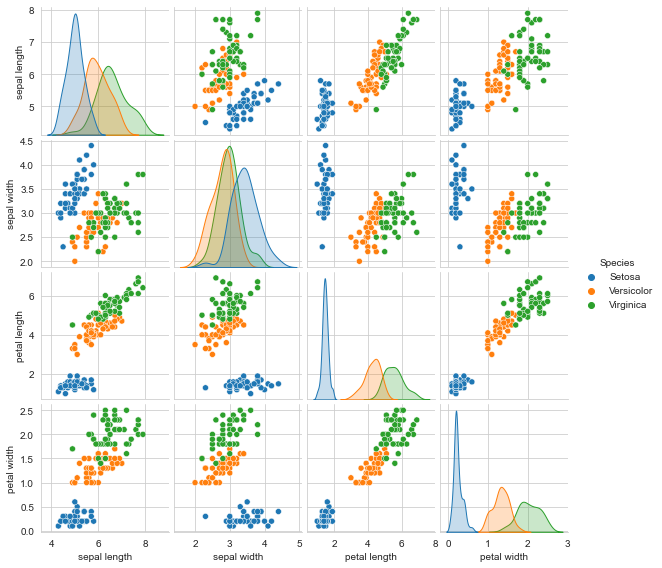

In [8]:
sns.pairplot(iris,hue='Species', size=2)

We actually can begin to see the groupings between the three different Iris types. The Data allows us to see that if we look at Setosa, it really is quite distinct from most of the other two species so looking at this as Blue group you can very clearly see that it's separated in sepal lenght, and sepal width and petal lenght and petal width.

Then the other two species so the challenge really for multiclass classification for this data set looks like separating versicolor vs virginia will be the challenge because the SeTosa is quite clearly in all cases separate from the other two species

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [11]:
logreg= LogisticRegression()
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=.4, random_state=3)

In [12]:
logreg.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
from sklearn import metrics
Y_pred=logreg.predict(X_test)

print(metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


our model had almost 93 percent accuracy.
and there's not that much crossover between pedal lengths for vesicolor and virginica 

Yeah so we should actually expect a pretty strong model 

In [22]:
#k Nearest Mean
from sklearn.neighbors import KNeighborsClassifier

In [40]:
k_range= range(1,25)
accuracy=[]

In [41]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'Testing Accuracy')

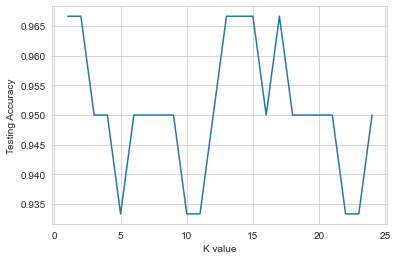

In [42]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')

so we can conclude our accuracy peaks when k value is around 0 to 3, 12to 15, and sharply around 17

IndentationError: unexpected indent (<ipython-input-44-42031aebfdba>, line 3)